<a href="https://colab.research.google.com/github/Jaykumaran/Interview-ML/blob/main/Python_interview_DSA_for_AI_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Use Python Visualiser for indepth Understanding (Highly recommend)
**https://pythontutor.com/render.html#mode=display**

**1.Reverse a string**

In [ ]:
def reverse_string(s):
  return s[::-1]
s="DSA"
reverse_string(s)

'ASD'

**2.Palindrome**

In [ ]:
def is_palindrome(s):
  return s==s[::-1]

s = "kayak"  #Case sensitive Kayak is not a palindrome
is_palindrome(s)


True

**3.Factorial**

In [ ]:
def factorial(n):
  if n <=1:
    return 1
  return n * factorial(n-1)

factorial(5)

120

**4.Fibonacci Series**

Generate the nth fibonacci number

In [ ]:
def fibonacci(n):
  if n<=1:
    return n
  return fibonacci(n-1)+fibonacci(n-2)

for i in range(10):
  print(fibonacci(i))


0
1
1
2
3
5
8
13
21
34


**5.LInkedin List Cycle Detection**


Understanding Linked Lists:

https://www.geeksforgeeks.org/python-linked-list/

Concept: A linked list is a linear data structure where elements (called nodes) are not stored in contiguous memory locations. Instead, each node contains a value and a pointer (called next) that points to the next node in the list.


Visual: Imagine a train where each car is a node, and the connection between cars (the "next" pointer) allows you to move from one car to the next.

Cycle: A cycle occurs when the last node's "next" pointer points back to a previous node, creating a loop in the list.

Imagine a circular racetrack where two runners (slow and fast) start at the same point. The fast runner covers more ground in each step. If there's a loop, they will eventually meet at some point on the track. If there's no loop, the fast runner will reach the end of the track without encountering the slow runner.

In [ ]:
#For Node definition
class ListNode:
  def __init__(self, value=0, next=None):
    self.value = value  # Data stored in the node
    self.next = next    # Pointer to the next node


#to find loop
def has_cycle(node):
  slow, fast = node, node  # Initialize two pointers at the head
  while fast and fast.next:  # Loop until either pointer reaches the end
    slow = slow.next         # Move slow pointer one step at a time
    fast = fast.next.next    # Move fast pointer two steps at a time
    if slow == fast:         # Check if they meet
      return True            # Cycle detected
  return False               # No cycle found


node1 = ListNode(1)
node2 = ListNode(2)
node3 = ListNode(3)
node4 = ListNode(4)

node1.next = node2
node2.next = node3
node3.next = node4
node4.next = node2  # This creates a cycle at node2

# Calling the function
has_cycle_result = has_cycle(node1)

# Output: True
print(f"List with cycle: {has_cycle_result}")


List with cycle: True


**6.Merge two Sorted  Linked List**

Imagine the following train sequence:

Engine (dummy node) -> Empty wagon (current pointer) -> Wagon filled with 1 (l1) -> Wagon filled with 3 (l1.next)


After merging l1's first node:

Engine (dummy node) -> Wagon filled with 1 (current.next) -> Empty wagon (current pointer) -> Wagon filled with 3 (l1.next)

In [ ]:

def merge_sorted_lists(l1,l2):
  dummy = ListNode(0)
  current = dummy

  while l1 and l2: #until non -empty
    if l1.value < l2.value:
      current.next, l1=l1, l1.next
    else:
      current.next,l2=l2,l2.next
    current = current.next

  current.next = l1 or l2
   #whichever becomes filled the remaining list appends at last with dummy.next

  return dummy.next


l1 = ListNode(1, ListNode(3, ListNode(5)))
l2 = ListNode(2, ListNode(4, ListNode(6)))

merged_list = merge_sorted_lists(l1, l2)

current = merged_list
while current:
    print(current.value, end=" -> ")
    current = current.next
print("None")  # Indicate the end of the list


# Output: 1 -> 2 -> 3 -> 4 -> 5 -> 6



1 -> 2 -> 3 -> 4 -> 5 -> 6 -> None


**7.Find the Middle of LinkedList**

This is because fast covered twice the distance but stopped at the end, while slow covered half the distance and landed in the middle.


In [ ]:
def find_middle(node):
  slow,fast = node,node
  while fast and fast.next:
    slow = slow.next #one step
    fast = fast.next.next #double step
  return slow

node1 = ListNode(1)
node2 = ListNode(2)
node3 = ListNode(3)
node4 = ListNode(4)
node5 = ListNode(5)


node1.next = node2
node2.next = node3
node3.next = node4
node4.next = node5

middle_node = find_middle(node1)

print(middle_node.value)



3


**8.Find the maximum subarray sum using Kadane's algorithm**

**Subarray:** A contiguous sequence of elements within an array.

**Maximum Subarray Sum**: The goal is to find the subarray that has the largest sum among all possible subarrays within the given array.


Set max_current to the first element of the array.

Set max_global to the same value (initially assuming the largest sum might be just the first element).


Loop through the array from the second element to the end.

For each element nums[i]:
Compare nums[i] alone to max_current + nums[i] (adding it to the current subarray).

Choose the larger value and update max_current. This ensures we're always tracking the maximum sum ending at the current position.

Update max_global if max_current becomes larger, as it might represent a new overall maximum subarray sum

In [ ]:
def max_subarray(nums):
  max_current = max_global = nums[0]
  for i in range (1,len(nums)):
      max_current = max(nums[i],max_current+nums[i]) #add to previous i.e here -2+1
      max_global = max(max_global,max_current) #1
  return max_global

nums = [-2, 1, -3, 4, -1, 2, 1, -5, 4]
max_sum = max_subarray(nums)

# Output: 6
print(max_sum)  # Subarray [4, -1, 2, 1] has the maximum sum


6


**9.Check if a binary tree is balanced**

**Balanced Tree Example**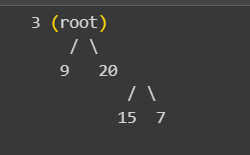

In [ ]:
class TreeNode:
    def __init__(self, value=0, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right

def is_balanced(root):
    def check_balance(node):
        if not node:
            return 0, True
        left_height, left_balanced = check_balance(node.left)
        right_height, right_balanced = check_balance(node.right)
        return max(left_height, right_height) + 1, left_balanced and right_balanced and abs(left_height - right_height) <= 1
        # Return the current node's height and balance status.
        # abs-> Ensure the difference between their heights is at most 1
    return check_balance(root)[1]

root = TreeNode(3)
root.left = TreeNode(9)
root.right = TreeNode(20)
root.right.left = TreeNode(15)
root.right.right = TreeNode(7)

# Output: True
print(is_balanced(root))


root = TreeNode(1)
root.left = TreeNode(2)
root.left.left = TreeNode(3)
root.left.left.left = TreeNode(4)  # Left subtree becomes too deep

# Output: False
print(is_balanced(root))


True
False


**10.Breadth-first Search approach (BFS) in Graph**

BFS is often used for finding shortest paths in unweighted graphs.

queue.extend(graph[vertex] - visited):

Adds all unvisited neighbors of the node to the queue.

In [ ]:
from collections import deque

def bfs(graph, start):
    visited = set()
    queue = deque([start])
    while queue:
        vertex = queue.popleft()
        if vertex not in visited:
            visited.add(vertex)
            queue.extend([neighbor for neighbor in graph[vertex] if neighbor not in visited])
    return visited
# graph[vertex] -> list
# visited = set

graph = {
  'A': ['B', 'C'],
  'B': ['D', 'E'],
  'C': ['F'],
  'D': [],
  'E': ['F'],
  'F': []
}

visited = bfs(graph, 'A')
print(visited)
# Output: {'A', 'B', 'C', 'D', 'E', 'F'} if visited is a list
# Output: {'F', 'B', 'C', 'E', 'D', 'A'} if visited is a set



{'F', 'B', 'C', 'E', 'D', 'A'}


**11.Depth first search**


BFS prioritizes exploring nodes closest to the starting point, while DFS prioritizes exploring deeper paths first.


In [ ]:

def dfs(graph, start):
    visited = set()
    stack = [start]
    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            stack.extend([neighbor for neighbor in graph[vertex] if neighbor not in visited])  # Add unvisited neighbors
    return visited


graph = {
  'A': ['B', 'D'],
  'B': ['C', 'E'],
  'C': ['F'],
  'D': ['A'],
  'E': ['B'],
  'F': []
}

visited = dfs(graph, 'A')
print(visited)  # Output: {'A', 'B', 'E', 'C', 'F', 'D'}
#Sets are inherently unordered, so the specific arrangement of
#elements within the set might vary across runs.

{'F', 'B', 'C', 'E', 'D', 'A'}


**12.Implement a stack using linked list.**

In [ ]:
class StackNode:
    def __init__(self, value=0, next=None):
        self.value = value
        self.next = next

class Stack:
    def __init__(self):
        self.top = None

    def push(self, value):
        self.top = StackNode(value, self.top)

    def pop(self):
        if not self.top:
            return None
        value = self.top.value
        self.top = self.top.next
        return value

    def peek(self):
        return None if not self.top else self.top.value

    def is_empty(self):
        return self.top is None

stack = Stack()
stack.push(5)
stack.push(3)
stack.push(7)

print(stack.pop())   # Output: 7
print(stack.peek())  # Output: 3
print(stack.is_empty())  # Output: False



7
3
False


**13.Implement a queue using two stacks.**

Simulate a queue's first-in, first-out (FIFO) behavior using two stacks, which are inherently i.e stacks by default
 are last-in, first-out (LIFO).

In [ ]:
class Queue:
    def __init__(self):
        self.stack1 = []
        self.stack2 = []

    def enqueue(self, value):
        self.stack1.append(value)

    def dequeue(self):
        if not self.stack2: #if stack2 is empty
            while self.stack1:
                self.stack2.append(self.stack1.pop())
# Transfers all elements from stack1 to stack2, reversing their order (LIFO to FIFO).
        return self.stack2.pop() if self.stack2 else None
#Pops and returns the top element from stack2 (FIFO behavior).
# Returns None if both stacks are empty.


queue = Queue()
queue.enqueue(10)
queue.enqueue(5)
queue.enqueue(15)
#this append will saved in stack1  ,then last in first out goes to stack2
#stack2 ->(15,5,10)
#dequeue -> Last in last out
#Becomes now FIFO
print(queue.dequeue())   # Output: 10
queue.enqueue(20)
print(queue.dequeue())   # Output: 5
print(queue.dequeue())   # Output: 15
print(queue.dequeue())   # Output: 20
print(queue.dequeue())   # Output: None (queue is empty)


10
5
15
20
None


**14.Implement binary search for a sorted list**

The binary search divides the input array by half at every step. After every step, either we find the index we are looking for, or we discard half of the array.

https://www.educative.io/courses/coderust-hacking-the-coding-interview/implement-binary-search-on-a-sorted-array

In [ ]:
def binary_search(arr, x):
    l, r = 0, len(arr) - 1
    while l <= r:
        mid = (l + r) // 2
        if arr[mid] == x:
            return mid
        elif arr[mid] < x:
            l = mid + 1
        else:
            r = mid - 1
    return -1  # as low is greater than high means didnt find the target but found range


arr = [2, 5, 7, 10, 15, 20]
x = 15 #target

result = binary_search(arr, x)
print(result)  # Output: 4


**15.Find First and Last Position of Element in Sorted Array**

find_left_boundary(nums, target):

Finds the leftmost index of the target value using binary search.

If the target isn't found, returns the index where it would be inserted.

search_range(nums, target):

Calls find_left_boundary twice to find the left and right boundaries of the target range.

Returns the [left, right] range if found, otherwise [-1, -1].



In [ ]:
def search_range(nums, target):
    def find_left_boundary(nums, target):
        left, right = 0, len(nums) - 1
        while left <= right:
            mid = (left + right) // 2
            if nums[mid] < target:
                left = mid + 1
            else:
                right = mid - 1
        return left

    left, right = find_left_boundary(nums, target), find_left_boundary(nums, target + 1) - 1
    if left <= right:
        return [left, right]
    return [-1, -1]


arr = [5, 7, 7, 8, 8, 10]
target = 8

result = search_range(arr, target)
print(result)  # Output: [3, 4]


nums = [5, 7, 7, 8, 8, 10]
target = 6

result = search_range(arr, target)
print(result)  # Output: [-1, -1]


[3, 4]
[-1, -1]


**16.Implement a priority queue using heap**

https://www.geeksforgeeks.org/difference-between-heaps-and-sorted-array/

https://www.geeksforgeeks.org/how-to-implement-priority-queue-using-heap-or-array/

In [ ]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.queue = []

    def enqueue(self, value, priority=0):
        heapq.heappush(self.queue, (priority, value))

    def dequeue(self):
        return heapq.heappop(self.queue)[1] if self.queue else None

pq = PriorityQueue()
pq.enqueue("Task A", 3) #(value,priority) -> tuple
pq.enqueue("Task B", 1)
pq.enqueue("Task C", 2)

print(pq.dequeue())   # Output: Task B (has lowest priority 1)
pq.enqueue("Task D", 4)

print(pq.dequeue())   # Output: Task C (next lowest priority 2)
print(pq.dequeue())   # Output: Task A (priority 3)
print(pq.dequeue())   # Output: Task D (highest priority 4)


Task B
Task C
Task A
Task D


**17.Implement a simple hashmap**

https://www.geeksforgeeks.org/what-are-hash-functions-and-how-to-choose-a-good-hash-function/

https://www.geeksforgeeks.org/hash-map-in-python/



In [ ]:
class Hashmap:
    def __init__(self):
        self.size = 1000
        self.map = [None] * self.size

    def _hash(self, key):
        return hash(key) % self.size

    def put(self, key, value):
        key_hash = self._hash(key)
        self.map[key_hash] = value

    def get(self, key):
        key_hash = self._hash(key)
        return self.map[key_hash] #returns value

    def remove(self, key):
        key_hash = self._hash(key)
        self.map[key_hash] = None

hashmap = Hashmap()
hashmap.put("name", "Alice")
hashmap.put("age", 30)

print(hashmap.get("name"))   # Output: Alice
hashmap.remove("age")
print(hashmap.get("age"))   # Output: None



Alice
None


**18.(Prefix Tree) Implement a basic trie for word insert, search and prefix search.**

https://www.geeksforgeeks.org/trie-insert-and-search/

In [ ]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.is_end_of_word = False

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word):
        node = self.root
        for char in word:
            if char not in node.children:
                node.children[char] = TrieNode()
                #Traverses the trie, creating nodes for characters as needed.
            node = node.children[char] #moves to next pos
        node.is_end_of_word = True

    def search(self, word):
        node = self.root
        for char in word:
            if char not in node.children:
                return False
            node = node.children[char]
        return node.is_end_of_word

    def starts_with(self, prefix):
        node = self.root
        for char in prefix:
            if char not in node.children:
                return False
            node = node.children[char]
        return True

trie = Trie()
trie.insert("apple")
trie.insert("ape")
trie.insert("application")

print(trie.search("apple"))   # Output: True
print(trie.search("ape"))     # Output: True
print(trie.search("app"))     # Output: False
print(trie.starts_with("app"))  # Output: True



True
True
False
True


**19.Implement a topological sort for a directed graph.**

https://www.geeksforgeeks.org/topological-sorting/

In DFS, we print a vertex and then recursively call DFS for its adjacent vertices. In topological sorting, we need to print a vertex before its adjacent vertices.

vertex -> no incoming edges

In [ ]:
from collections import defaultdict, deque

def topological_sort(vertices, edges):
    graph = defaultdict(list)
    in_degree = {v: 0 for v in vertices} #initailise with no incoming edge
# all vertices set in_degree to 0 ata start
    for u, v in edges: #tuple (A,B) -> (u,v)
        graph[u].append(v)
# defaultdict(<class 'list'>, {'A': ['B'], 'B': ['C'], 'C': ['D'], 'D': ['E'], 'E': ['A']})
        in_degree[v] += 1
# "A"	1
# "B"	1
# "C"	1
# "D"	1
# "E"	1


    queue = deque([v for v, d in in_degree.items() if d == 0])
    order = []

    while queue: #loop over deque instance
        vertex = queue.popleft() #remove already added,temp empty deque
        order.append(vertex)
        for neighbor in graph[vertex]:
            in_degree[neighbor] -= 1
            if in_degree[neighbor] == 0:
                queue.append(neighbor) #enqueue

    return order if len(order) == len(vertices) else []

vertices = ["A", "B", "C", "D", "E"]
edges = [("A", "B"), ("B", "C"), ("C", "D"), ("D", "E"), ("E", "A")]

sorted_order = topological_sort(vertices, edges)

if sorted_order:
  print("Topological sort:", ", ".join(sorted_order)) #directed acyclic
else:
  print("Cycle detected, no topological sort possible.")


vertices = ["A", "B", "C", "D", "E"]
edges = [("A", "B"), ("B", "C"), ("C", "D"), ("D", "E"), ("B", "E")]

sorted_order = topological_sort(vertices, edges)

if sorted_order:
  print("Topological sort:", ", ".join(sorted_order)) #directed acyclic
else:
  print("Cycle detected, no topological sort possible.")


Cycle detected, no topological sort possible.
Topological sort: A, B, C, D, E


**20.Check if a String Contains All Binary Codes of Size K**

Given a binary string s and an integer k, check if all binary codes of length k is a substring of s.


In [ ]:
def has_all_binary_codes(s, k):
    needed = 1 << k #bitwise left shift,  so needed =4
    #effectively when dng bitwise op. left 2^^k is happening internally
    seen = set()

    for i in range(len(s) - k + 1): #(4-2+1)
        substring = s[i:i+k] #with size of k like a stride or no.of sub at a time
        if substring not in seen:
            seen.add(substring) #add as it is a set
            needed -= 1 #decrements in each i iter 4,3,2,1,0
            if needed == 0:
                return True
    return False

s = "00110110"
k = 2  # "00" "01" "10" "11"
result = has_all_binary_codes(s, k)
print(result)  # Output: True


True


**21.Quicksort**

In [ ]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

arr = [6, 2, 8, 4, 5, 1]
sorted_arr = quicksort(arr)
print(sorted_arr)  # Output: [1, 2, 4, 5, 6, 8]


[1, 2, 4, 5, 6, 8]


**22.Implement MergeSort**

In [ ]:
def mergesort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
    return merge(mergesort(left), mergesort(right))

def merge(left, right):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result
arr = [6, 2, 8, 4, 5, 1]
sorted_arr = mergesort(arr)
print(sorted_arr)  # Output: [1, 2, 4, 5, 6, 8]


[1, 2, 4, 5, 6, 8]


**23.Find the maximum depth of a binary tree.**

In [ ]:
def max_depth(root):
    if not root:
        return 0
    left_depth = max_depth(root.left)
    right_depth = max_depth(root.right)
    return max(left_depth, right_depth) + 1
#Tree with Only a Root: If a tree has only a root node, its depth is 1 (the root itself).
#needs to add 1 to account for the root node connecting those subtrees

class Node:
  def __init__(self, value):
    self.value = value
    self.left = None
    self.right = None

root = Node(1)
root.left = Node(2)
root.left.left = Node(4)
root.left.right = Node(5)
root.right = Node(3)
root.right.left = Node(6)
root.right.right = Node(7)

depth = max_depth(root)
print(depth)  # Output: 3



3


**24.Longest Increasing subsequence**(LIS)

Given an unsorted array of integers, find the length of longest increasing subsequence.

Dynamic Programming (DP): A technique for solving problems by breaking them down into smaller subproblems and storing results to avoid redundant calculations.


In [ ]:
def length_of_lis(arr):
    if not arr:
        return 0 #empty

    dp = [1] * len(arr) #Dynamic Programming (DP) table
# Create a DP table dp with the same length as the array.
# Initialize each dp[i] to 1, representing the minimum possible LIS ending at index i (just the element itself).
    for i in range(len(arr)):
        for j in range(i):
            if arr[i] > arr[j]:
                dp[i] = max(dp[i], dp[j] + 1)

    return max(dp)

arr = [10, 9, 2, 5, 3, 7, 101, 18]
lis_length = length_of_lis(arr)
print(lis_length)  # Output: 4


4


**25.Write a function to find the longest common prefix string amongst an array of strings. If there is no common prefix, return an empty string ""**

In [ ]:
def longest_common_prefix(strs):
    if not strs:
        return ""

    prefix = strs[0] #flower
    for s in strs[1:]: #flow,flight
        i = 0
        #length of prefix = 6->string length
        #len(s) -> 4 ,so upto i=4 it will iter
        while i < len(prefix) and i < len(s) and prefix[i] == s[i]:
            i += 1
        prefix = prefix[:i] #in first iter prefix=f,prefix iter 2 = fl
    return prefix
strs = ["flower", "flow", "flotty"]
common_prefix = longest_common_prefix(strs)
print(common_prefix)  # Output: "fl"


flo


**26.Check for Balanced Parentheses**


 Given a string containing just the characters '(', ')', '{', '}', '[' and ']', determine if the input string is valid. An input string is valid if brackets are closed in the correct order.

In [ ]:
def is_valid(s):
    stack = []
    mapping = {")": "(", "}": "{", "]": "["}

    for char in s:
        if char in mapping:
            top_element = stack.pop() if stack else '#'  #return top value
            if mapping[char] != top_element: #has to be a key i.e fist element
#If it's an opening parenthesis ((, {, or [):
# Push it onto the stack (pending closing pair).
                return False
        else:
            stack.append(char)

    return not stack


s = "({[]})"
balanced = is_valid(s)
print(balanced)  # Output: True

s2 = "([)]"
balanced2 = is_valid(s2)
print(balanced2)  # Output: False


True
False


**27.Intersection of Two Arrays**

 Given two arrays, write a function to compute their intersection. Each element in the result should appear as many times as it shows in both arrays. The result can be in any order.



In [ ]:
from collections import Counter

def intersect(arr1, arr2):
    c1, c2 = Counter(arr1), Counter(arr2)
    return list((c1 & c2).elements())




arr1 = [1, 2, 2, 1,2,4]
arr2 = [2, 2, 3, 4]
intersection = intersect(arr1, arr2)
print(intersection)  # Output: [2, 2]


[2, 2, 4]


**28.Given a non-empty array of integers nums, every element appears twice except for one. Find that single one.**

In [ ]:
def single_number(arr):
   res = 0
   for num in arr:
     res ^= num
   return res

nums = [2, 2, 1, 4, 4]
single_num = single_number(nums)
print(single_num)  # Output: 1


1


**29.Given an array, rotate the array to the right by k steps, where k is non-negative.**



In [ ]:
def rotate_array(arr,k):
   k %= len(arr)
   arr[:] = arr[-k:] + arr[:-k]

nums = [1, 2, 3, 4, 5, 6, 7]
k = 3
rotate_array(nums, k)
print(nums)  # Output: [5, 6, 7, 1, 2, 3, 4]

nums = [1, 2, 3, 4, 5, 6, 7]
k = 10
rotate_array(nums, k)
print(nums)  # Output: [5, 6, 7, 1, 2, 3, 4] -> Modulo ensures k within bound
#So rotated array remains same

# Handle Excess k:
# Calculate k % len(nums) to ensure k is within the array's bounds (prevents unnecessary rotations).
# Slice and Concatenate:
# Create a new slice of the array containing the last k elements: nums[-k:].
# Create another slice with the remaining elements: nums[:-k].
# Concatenate these slices in reverse order: nums[-k:] + nums[:-k].
# Assign this combined slice back to nums[:], efficiently
#  overwriting the entire array with the rotated result.

[5, 6, 7, 1, 2, 3, 4]
[5, 6, 7, 1, 2, 3, 4]


 **30.Implement strStr()**

  Return the index of the first occurrence of needle in haystack, or -1 if needle is not part of haystack.

In [ ]:
def str_str(haystack,needle):
  if not needle:
     return 0
  return haystack.find(needle)
#find() returns the index of the first occurrence of needle if found.

haystack = "hello _world"
needle = "world"
index = str_str(haystack, needle)
print(index)  # Output: 6

haystack = "hello _world"
needle = "AI"
index = str_str(haystack, needle)
print(index)  # Output: -1 if not found


7
-1


**31.Product of Array Except Self**

 Given an array nums of n integers where n > 1, return an array output such that output[i] is equal to the product of all the elements of nums except nums[i].

In [ ]:
def product_except_self(nums):
    length = len(nums)
    output = [1] * length
    left, right = 1, 1
#output = [1,1,1,1]
#arr=[1,2,3,4]
# Create an output array filled with 1s, which will store the final results.
# Initialize two variables, left and right, to 1, representing prefix and suffix products, respectively.
    for i in range(length):
      output[i] *= left #output[0] *= 1 = 1
      left *= arr[i] #1*arr[0] = 1*1=> left=1
      output[-1-i] *= right #out[-1-0] = out[-1]=1, 1*1=1=>out[-1-i]=1
      right *= arr[-1-i] #1*arr[-1-0] 1*4 =>right=4
#output[-1 - i] = output[-1 - i] * right.

    return output
# -1 accesses the last element of the array.
# - i subtracts the current loop counter (i) from it,
#  moving towards the left as i increases.
#     return output

nums = [1, 2, 3, 4]
result = product_except_self(nums)
print(result)  # Output: [24, 12, 8, 6]


[24, 12, 8, 6]


**32.First Unique Character in a String**

Given a string, find the first non-repeating character in it and return its index. If it doesn't exist, return -1.

In [ ]:
from collections import Counter

def first_uniq_char(s):
   count = Counter(s)
  #  Counter({'e': 3, 'l': 1, 't': 1, 'c': 1, 'o': 1, 'd': 1})
   for idx,ch in enumerate(s):
      if count[ch] == 1: #single occurence
         return idx
   return -1

s = "leetcode"
first_unique_index = first_uniq_char(s)
print(first_unique_index)  # Output: 0 #i.e i=0  l is unique and its first occurence in the string

s = "GeeksForGeeks"
first_unique_index = first_uniq_char(s)
print(first_unique_index)  # Output: 5 #i.e i=5  F is unique and its first occurence in the string
#Counter({'e': 4, 'G': 2, 'k': 2, 's': 2, 'F': 1, 'o': 1, 'r': 1})

0
5


**33.Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.**

In [ ]:
def two_sum(nums,target):
    num_to_index = {}
    for i,num in enumerate(nums): #(i=0,num=2), (i=1,num=7)
      diff = target - num #(9-2 = 7) , (9-7=2)
      if diff in num_to_index: #7 not yet there ,#2 is there
        return [num_to_index[diff],i] #so return n_t_d[2] = 0 ->[0,1]
      num_to_index[num] =i #num_to_index[2] = 0 so {2:0} #as we have to return the index

nums = [2, 7, 11, 15]
target = 9
indices = two_sum(nums, target)
print(indices)  # Output: [0, 1]


[0, 1]


**Find max of array**

In [ ]:
from collections import Counter

def majority_element(nums):
    counts = Counter(nums)
    return max(counts.keys(), key=counts.get)


nums = [3, 2, 3, 4, 3, 3, 2]
majority_element = majority_element(nums)
print(majority_element)  # Output: 3

**34.Given an array of size n, find the majority element. The majority element is the element that appears more than n/2 times**.


In [ ]:

from collections import Counter

def majority_element(nums):
    counts = Counter(nums)
    most_common = counts.most_common(1)[0][0]  # Get the element with the highest count #[first_dim][key] if [0][1] its [first_dim][value]
    if counts[most_common] > len(nums) // 2:  # Check if it's truly a majority element
        return most_common
    else:
        return None  # No majority element found

nums = [3, 2, 3, 3, 3, 5, 2]
majority_element = majority_element(nums)
print(majority_element)  # Output: None



3


**35.Count the number of prime numbers less than a non-negative number, n.**

Sieve of Eratosthenes: An efficient algorithm for finding prime numbers up to a given limit.

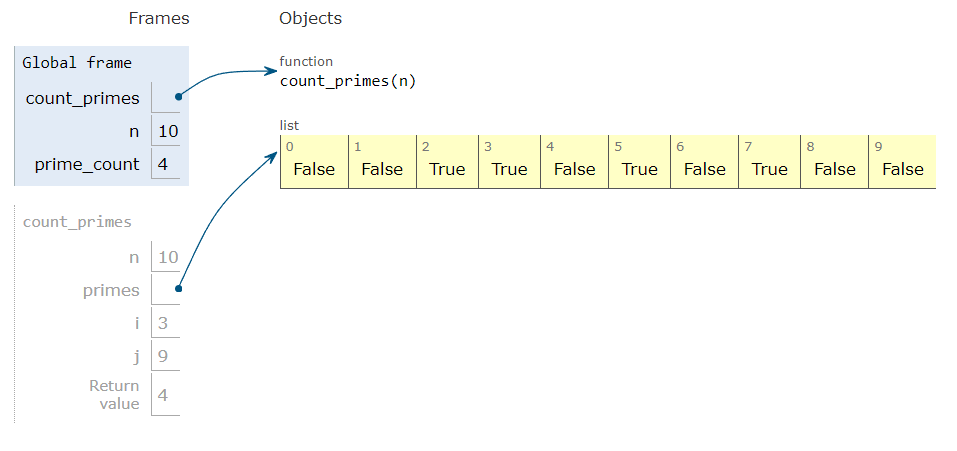

In [ ]:
def count_primes(n):
    if n <= 2:
        return 0
    primes = [True] * n #[True]*10 Create a list primes of length n, filled with True values, initially assuming all numbers are prime.
    primes[0], primes[1] = False, False #Mark 0 and 1 as False (they are not prime).
    for i in range(2, int(n**0.5) + 1):  #range(2,3+1)
        if primes[i]:  #if prime[2]  -> prime[i] is still True
            for j in range(i*i, n, i): #range(2*2,10,2) -> (4,6,8)
                primes[j] = False # mark them as False (not prime).
    return sum(primes)

n = 10
prime_count = count_primes(n)
print(prime_count)  # Output: 4


4


**36.Given an array nums, write a function to move all 0's to the end of it while maintaining the relative order of the non-zero elements.**

In [ ]:
def move_zeroes(nums):
    pos = 0
    for i in range(len(nums)):
        if nums[i] != 0:
            nums[pos], nums[i] = nums[i], nums[pos] #nums[0],nums[1] = nums[1],nums[0] #swapping position to move all non-zero to left
            pos += 1

nums = [0, 1, 0, 3, 12, 0, 4, 0]
move_zeroes(nums)
print(nums)  # Output: [1, 3, 12, 4, 0, 0, 0, 0]


[1, 3, 12, 4, 0, 0, 0, 0]


**37.Find Anagram**

Anagrams: Two strings are anagrams if they contain the same characters in the same counts, but possibly in a different order

In [ ]:
from collections import Counter

def is_anagram(s, t):
    return Counter(s) == Counter(t)

s = "listen"
t = "silent"
is_anagram_result = is_anagram(s, t)
print(is_anagram_result)  # Output: True



True


**38.Given a singly linked list, determine if it is a palindrome.**

Use Python Visualiser for better understanding

**https://pythontutor.com/render.html#mode=display**

In [ ]:
class ListNode:
   def __init__(self,value=0,next=None):
     self.value = value
     self.next = next

def is_palindrome(head):
    values = [] #list to store node values
    current = head #base node
    while current:
       values.append(current.value)
       current = current.next #points next

    return values == values[::-1]

# Create a linked list (1 -> 2 -> 2 -> 1)
head = ListNode(1, ListNode(2, ListNode(2, ListNode(1))))

is_palindrome_result = is_palindrome(head)
print(is_palindrome_result)  # Output: True


# Create a linked list (1 -> 2 -> 3 -> 2)
head = ListNode(1, ListNode(2, ListNode(3, ListNode(2))))

is_palindrome_result = is_palindrome(head)
print(is_palindrome_result)  # Output: True


True
False


**39.Design a stack that supports push, pop, top, and retrieving the minimum element in constant time.**

In [ ]:
class MinStack:
    def __init__(self):
        self.stack = []
        self.min_stack = []

    def push(self, x):
        self.stack.append(x)
        if not self.min_stack or x <= self.min_stack[-1]: #either not in min_stack or less than min_stack
            self.min_stack.append(x)

    def pop(self):
        if self.stack.pop() == self.min_stack[-1]:
            self.min_stack.pop()

    def top(self):
        return self.stack[-1]

    def getMin(self):
        return self.min_stack[-1]  #arranged in descending order so [5,3] -> 3

#Stack follows Last in First out
min_stack = MinStack()
min_stack.push(5)
min_stack.push(3)
min_stack.push(2)
min_stack.push(1)

print(f"Top element: {min_stack.top()}")  # Output: 1
print(f"Minimum element: {min_stack.getMin()}")  # Output: 1

min_stack.pop()
min_stack.pop()

print(f"Top element: {min_stack.top()}")  # Output: 3
print(f"Minimum element: {min_stack.getMin()}")  # Output: 3



**40.Binary Tree Level Order Traversal**

Given a binary tree, return the level order traversal of its nodes' values.

In [ ]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def level_order(root):
    if not root:
        return []
    result, queue = [], [root] #enqueue root in queue
    while queue:
        level, level_len = [], len(queue)
        for i in range(level_len):
            node = queue.pop(0)
            level.append(node.val)
            if node.left:
                queue.append(node.left)
            if node.right:
                queue.append(node.right)
        result.append(level)
    return result

# Create a sample binary tree
#value,left,right
root = TreeNode(3, TreeNode(9), TreeNode(20, TreeNode(15), TreeNode(7)))

level_order_result = level_order(root)
print(level_order_result)  # Output: [[3], [9, 20], [15, 7]]


[[3], [9, 20], [15, 7]]


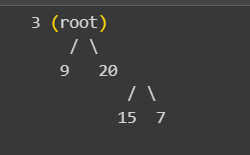

**41.Invert a binary tree.**

In [ ]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def invert_tree(root):
    if not root:
        return None
    root.left, root.right = invert_tree(root.right), invert_tree(root.left)
    return root



# Code to invert the tree:
root = TreeNode(4, TreeNode(2, TreeNode(1), TreeNode(3)), TreeNode(7, TreeNode(6), TreeNode(9)))
inverted_root = invert_tree(root)
print(f'root: {inverted_root.val}')
# The output is the root of the inverted tree:
print(inverted_root)  # Output: TreeNode(4, TreeNode(7, TreeNode(9), TreeNode(6)), TreeNode(2, TreeNode(3), TreeNode(1)))


# Original tree structure:
#         4
#       /   \
#      2     7
#     / \   / \
#    1   3 6   9

# #Inverted Tree structure:
#         4
#       /   \
#      7     2
#     / \   / \
#    9   6 3   1
# def in_order_traversal(root):
#     if root:
#         in_order_traversal(root.left)
#         print(root.val, end=" ")  # Print the node's value
#         in_order_traversal(root.right)

# inverted_root = invert_tree(root)  # Invert the tree
# level_order_result = level_order(inverted_root)  # Perform level-order traversal
# print(level_order_result)  # Output: [[4], [7, 2], [9, 6, 3, 1]]


root: 4
[[4], [2, 7], [1, 3, 6, 9]]


**42.Design an algorithm to serialize and deserialize a binary tree**


In [ ]:
class TreeNode:
    def __init__(self, value,left=None,right=None):
        self.val = value
        self.left = left
        self.right = right
#Converts a tree's structure into a string representation for storage or transmission.
class Codec:
    def serialize(self, root):
        def dfs(node):
            if not node:
                return ["None"]
            return [str(node.val)] + dfs(node.left) + dfs(node.right)
# returns a list containing the node's value, followed by the serialized representations of its left and right subtrees
        return ",".join(dfs(root))
#Serialize the Root: Call dfs(root) to start serialization from the root.
# Join String Elements: Concatenate the resulting list elements using commas (",") to create the final string representation.
    def deserialize(self, data):
#Reconstructs a tree from its serialized string representation.
        data_list = data.split(',')
#Split the string into a list of values using commas.
        def dfs():
            val = data_list.pop(0)
            if val == "None":
                return None
            node = TreeNode(int(val))
            node.left = dfs()
            node.right = dfs()
            return node
        return dfs()

# Original tree structure:
  #   1
  #  / \
  # 2   3
  #    / \
  #   4   5

# Create the correct tree structure
root = TreeNode(1, TreeNode(2), TreeNode(3, TreeNode(4), TreeNode(5)))

# Serialize and deserialize
codec = Codec()
serialized_data = codec.serialize(root)
print(serialized_data)  # Output: 1,2,None,None,3,4,None,None,5,None,None

deserialized_root = codec.deserialize(serialized_data)

print(deserialized_root)

1,2,None,None,3,4,None,None,5,None,None


**43.Given a non-empty array of integers, return the k most frequent elements.**


In [ ]:
from collections import Counter
import heapq

def top_k_frequent(nums, k):
    count = Counter(nums)
    return heapq.nlargest(k, count.keys(), key=count.get)


nums = [1, 1, 1, 2, 2, 3, 3, 3, 3]
k = 2

most_frequent = top_k_frequent(nums, k)

print(most_frequent)  # Output: [3, 1]


[3, 1]


**44.Given an encoded string, return its decoded string. The encoding rule is: k[encoded_string], where the encoded_string inside the square brackets is being repeated exactly k times.**

In [ ]:
def decode_string(s):
    stack, curr_num, curr_str = [], 0, ''
    for char in s:
        if char == '[':
            stack.append(curr_str)
            stack.append(curr_num)# in stack [curr_str,curr_num] is added
            curr_str, curr_num = '', 0
        elif char == ']':
            num = stack.pop()
            prev_str = stack.pop()
            curr_str = prev_str + num * curr_str # "" + 3 * a -> aaa
        elif char.isdigit():
            curr_num = curr_num * 10 + int(char)
        else:
            curr_str += char
    return curr_str

encoded_string = "3[a]2[bc]"
decoded_string = decode_string(encoded_string)

print(decoded_string)  # Output: aaabcbc


aaabcbc


**45.Given an image represented by an NxN matrix, rotate the image by 90 degrees.**

In [ ]:
def rotate_img_90(matrix):
    n = len(matrix)
    for i in range(n):
        for j in range(i, n):
            matrix[i][j], matrix[j][i] = matrix[j][i], matrix[i][j]
    for row in matrix:
        row.reverse()

image = [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]

rotate_img_90(image)

print(image)  # Output: [[7, 4, 1], [8, 5, 2], [9, 6, 3]]


[[7, 4, 1], [8, 5, 2], [9, 6, 3]]


**46.Find all Duplicates in an Array**

In [ ]:
def find_duplicates(nums):
    result = []
    for num in nums: #0
        index = abs(num) - 1 #abs(0) -> 4-1=3
        if nums[index] < 0: #this comes at last
            result.append(index + 1)
        nums[index] = -nums[index] #nums[3] = 7
    return result

# For 4, index = 3, nums[3] is not negative, so it's marked as -4.
# For 3, index = 2, nums[2] is not negative, so it's marked as -3.
# For 2, index = 1, nums[1] is not negative, so it's marked as -2.
# For 7, index = 6, nums[6] is not negative, so it's marked as -7.
# For 8, index = 7, nums[7] is not negative, so it's marked as -8.
# For 2 (duplicate), index = 1, nums[1] is already negative (-2), so it's added to the result list.
# For 3 (duplicate), index = 2, nums[2] is already negative (-3), so it's added to the result list.
# For 1, index = 0, nums[0] is not negative, so it's marked as -1.
# The final result list is [2, 3], correctly identifying the duplicates.

nums = [4, 3, 2, 7, 8, 2, 3, 1]
duplicates = find_duplicates(nums)

print(duplicates)  # Output: [2, 3]


[2, 3]


**47. Write a function to flatten a nested list.**

In [ ]:
def flatten(lst):
    result = []
    for i in lst:
        if isinstance(i, list):
            result.extend(flatten(i))
        else:
            result.append(i)
    return result

nested_list = [1, [2, 3, [4, 5]], 6]
print(flatten(nested_list))  # Output: [1, 2, 3, 4, 5, 6]


[1, 2, 3, 4, 5, 6]


In [ ]:
def flatten_dictionary(d, parent_key='', sep='.'):
    items = {}
    for k, v in d.items():
        new_key = f"{parent_key}{sep}{k}" if parent_key else k
        if isinstance(v, dict):
            items.update(flatten_dictionary(v, new_key, sep=sep))
        else:
            items[new_key] = v
    return items

nested_dict = {
    "a": 1,
    "b": {
        "c": 2,
        "d": {
            "e": 3
        }
    }
}
print(flatten_dictionary(nested_dict))  # Output: {'a': 1, 'b.c': 2, 'b.d.e': 3}


{'a': 1, 'b.c': 2, 'b.d.e': 3}


**48.Write a Python function to merge two dictionaries. If both dictionaries have the same key, prefer the second dictionary's value.**

In [ ]:
def merge_dicts(dict1, dict2):
    merged = dict1.copy()
    merged.update(dict2)
    return merged

dict1 = {'a': 1, 'b': 2}
dict2 = {'b': 3, 'c': 4}
print(merge_dicts(dict1, dict2))  # Output: {'a': 1, 'b': 3, 'c': 4}


{'a': 1, 'b': 3, 'c': 4}


**49.Write a function that checks if a string contains all letters of the alphabet at least once.**

In [ ]:
import string

def contains_all_alphabets(s):
    alphabet = set(string.ascii_lowercase)
    return set(s.lower()) >= alphabet

test_string = "The quick brown fox jumps over the lazy dog"
print(contains_all_alphabets(test_string))  # Output: True


True


**50.Write a function to check if two strings are a rotation of each other (e.g., "abcde" and "cdeab" are rotations of each other).**

In [ ]:
def are_rotations(str1,str2):
    if len(str1) != len(str2):
       return False
    print(str2+str2)
    return str1 in str2+str2 #cdeab+cdeab-> cdeabcdeab
s1 = "abcde"
s2 = "cdeab"
print(are_rotations(s1, s2))  # Output: True

cdeabcdeab
True


**51.Write a function to compute the square root of a given non-negative integer n without using built-in square root functions or libraries. Return the floor value of the result.**


In [ ]:
def sqrt(n):
    if n < 0:
        return None
    if n == 1:
        return 1
    start, end = 0, n
    while start <= end:
        mid = (start + end) // 2
        if mid * mid == n:
            return mid
        elif mid * mid < n:
            start = mid + 1
            ans = mid
        else:
            end = mid - 1 #nearest floor
    return ans

number = 17
print(sqrt(number))  # Output: 4


4


**52.Write a function to determine if two strings are one edit (or zero edits) away.**

In [ ]:
def is_one_edit_away(s1, s2):
    if abs(len(s1) - len(s2)) > 1:
        return False

    if len(s1) > len(s2):
        s1, s2 = s2, s1

    i, j, found_difference = 0, 0, False
    while i < len(s1) and j < len(s2):
        if s1[i] != s2[j]:
            if found_difference:
                return False
            found_difference = True
            if len(s1) == len(s2):
                i += 1
        else:
            i += 1
        j += 1
    return True

print(is_one_edit_away("pale", "ple"))   # Output: True
print(is_one_edit_away("pales", "pale")) # Output: True
print(is_one_edit_away("pale", "bale"))  # Output: True
print(is_one_edit_away("pale", "bake"))  # Output: False


# Iteration 1:
# s1[i] == s2[j] is True ("p" == "p")
# i and j are both incremented to 1.
# Iteration 2:
# s1[i] != s2[j] is True ("a" != "l")
# found_difference becomes True.
# If character mismatch occurs and strings have the same length, increment both i and j to skip both characters.
# If character mismatch occurs and strings have different lengths, increment only j to accommodate the insertion/deletion in the shorter string.
# Iteration 3:
# s1[i] == s2[j] is True ("l" == "l")
# i and j are both incremented to 3.
# Iteration 4:
# s1[i] == s2[j] is True ("e" == "e")
# i and j both reach the end of their respective strings.


True
True
True
False


**53.Write a function that reverses a string, but maintains the position of all non-alphabetic characters.**

Use py visualiser
https://pythontutor.com/render.html#mode=display

In [ ]:
def reverse_alphabet_only(s):
    s = list(s)
    i, j = 0, len(s) - 1
    while i < j:
        if not s[i].isalpha():
            i += 1
        elif not s[j].isalpha():
            j -= 1
        else:
            s[i], s[j] = s[j], s[i]
            i += 1
            j -= 1
    return ''.join(s)

string = "ab@cd#ef$gh"
print(reverse_alphabet_only(string))  # Output: "hg@fe#dc$ba"


hg@fe#dc$ba


**54.Write a function that returns the sum of two numbers represented as strings. Your function should not use built-in arithmetic operators or functions.**

Use py visualiser https://pythontutor.com/render.html#mode=display

In [ ]:
def add_string_num(num1,num2):
    res,carry,i,j = "",0,len(num1)-1,len(num2)-1
    while i>=0 or j>=0 or carry:
       n1 = int(num1[i]) if i >=0 else 0
       n2 = int(num2[j]) if j >=0 else 0
       temp_sum = n1+n2+carry
       #Reverse order
       res = str(temp_sum % 10) + res #12 #Extracts the digit representing the units place of the sum using modulo 10.
       carry = temp_sum // 10  #Updates the carry with the tens place of the sum (integer division by 10).
       i,j = i-1,j-1
    return res


n1 = "123"
n2 = "789"
print(add_string_num(n1, n2))  # Output: "912"


# Initialization:

# res = "" (empty string to store the sum in reverse order)
# carry = 0 (initial carry)
# i = 2 (indexing the last character of "123")
# j = 2 (indexing the last character of "789")
# Iteration 1:

# n1[i] = "1", n2[j] = "9"
# temp_sum = 1 + 9 + 0 = 10 # 0 is from prev carry=0
# res = "0" + "" = "0" (add units digit to res)
# carry = 10 // 10 = 1 (update carry with tens digit)
# i = 1, j = 1 (decrement pointers)
# Iteration 2:

# n1[i] = "2", n2[j] = "8"
# temp_sum = 2 + 8 + 1 = 11 # 1 is from prev carry=1
# res = "1" + "0" = "10" (add units digit to res)
# carry = 11 // 10 = 1 (update carry with tens digit)
# i = 0, j = 0 (decrement pointers)
# Iteration 3:

# n1[i] = "3", n2[j] = "7"
# temp_sum = 3 + 7 + 1 = 11
# res = "1" + "10" = "110" (add units digit to res)
# carry = 11 // 10 = 1 (update carry with tens digit)
# i = -1, j = -1 (pointers become out of bounds)
# Iteration 4:

# n1[i] = 0 (default value since i < 0)
# n2[j] = 0 (default value since j < 0)
# temp_sum = 0 + 0 + 1 = 1
# res = "1" + "110" = "1110" (add units digit to res)
# carry = 1 // 10 = 0 (no more carry)
# Loop terminates as all pointers are out of bounds and carry is 0


912


**55.Given a list of words, group the anagrams together**

In [ ]:
from collections import defaultdict

def group_anagrams(words):
    anagrams = defaultdict(list)
    #defaultdict(<class 'list'>, {'aet': ['eat', 'tea'], 'ant': ['tan', 'ant'], 'abt': ['bat']}
    for word in words:
        # Use sorted word as a key. All anagrams will result in the same key.
        sorted_word = ''.join(sorted(word)) #aet
        anagrams[sorted_word].append(word) #{aet: ['eat','tea']
    return list(anagrams.values())

words = ["eat", "tea", "tan", "ant", "bat"]
print(group_anagrams(words))  # Output: [['eat', 'tea'], ['tan', 'ant'], ['bat']]


[['eat', 'tea'], ['tan', 'ant'], ['bat']]


**56.Find the kth largest element in an unsorted array.**

In [ ]:
import heapq

def find_kth_largest(nums, k):
    return heapq.nlargest(k, nums)[-1]

nums = [3, 2, 1, 5, 6, 4]
k = 2
print(find_kth_largest(nums, k))  # Output: 5


5
